In [7]:
import utils
import tensorflow as tf
import numpy as np
import model
import config as cfg
import os

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
net = model.Net()

data = utils.PASCAL_VOC('train')
saver = tf.train.Saver()
weights_file = os.path.join(cfg.WEIGHTS_DIR, cfg.WEIGHTS_FILE)


[TL] InputLayer  Input/input: (?, 448, 448, 3)
[TL] Conv2d Layer1/conv_bn1conv: n_filter: 64 filter_size: (7, 7) strides: (2, 2) pad: SAME act: No Activation
[TL] BatchNormLayer Layer1/conv_bn1bn: decay: 0.900000 epsilon: 0.000010 act: leaky_relu is_train: False
[TL] MaxPool2d Layer1/pool1: filter_size: (2, 2) strides: (2, 2) padding: SAME
[TL] Conv2d Layer2/conv_bn2conv: n_filter: 192 filter_size: (3, 3) strides: (1, 1) pad: SAME act: No Activation
[TL] BatchNormLayer Layer2/conv_bn2bn: decay: 0.900000 epsilon: 0.000010 act: leaky_relu is_train: False
[TL] MaxPool2d Layer2/pool2: filter_size: (2, 2) strides: (2, 2) padding: SAME
[TL] Conv2d Layer3/conv_bn3conv: n_filter: 128 filter_size: (1, 1) strides: (1, 1) pad: SAME act: No Activation
[TL] BatchNormLayer Layer3/conv_bn3bn: decay: 0.900000 epsilon: 0.000010 act: leaky_relu is_train: False
[TL] Conv2d Layer3/conv_bn4conv: n_filter: 256 filter_size: (3, 3) strides: (1, 1) pad: SAME act: No Activation
[TL] BatchNormLayer Layer3/conv_b

In [9]:
with tf.Session() as sess:
    print('Restoring weights from: ' + weights_file)
    saver.restore(sess, weights_file)
    
    X, y = data.get()
    feed_dict = {net.X: X, net.y_hat: y}
    loss, pred = sess.run([net.loss, net.y], feed_dict = feed_dict)
    
    print(loss)
    print(pred.shape)

Restoring weights from: weights/09-24_14:31:23/yolo.ckpt-0
INFO:tensorflow:Restoring parameters from weights/09-24_14:31:23/yolo.ckpt-0
2.3841536
(16, 7, 7, 30)


confidence: 0.9998419284820557 confidence: 0.9998419 chair: 0.9999336004257202
confidence: 0.9885896444320679 confidence: 0.98858964 chair: 0.9995579123497009
confidence: 0.9863629937171936 confidence: 0.986363 chair: 0.9993554949760437
confidence: 0.9244611859321594 confidence: 0.9244612 chair: 0.9997476935386658
confidence: 0.6390113830566406 confidence: 0.6390114 cat: 0.8429914712905884


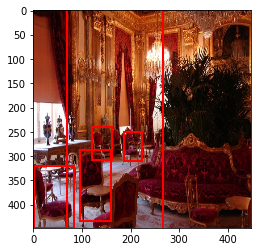

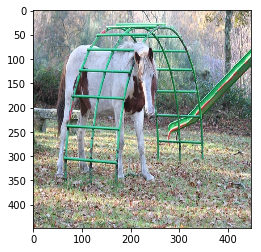

confidence: 0.5896531343460083 confidence: 0.58965313 person: 0.9994049072265625


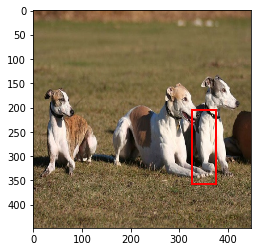

confidence: 0.7045653462409973 confidence: 0.70456535 bus: 0.9960575103759766


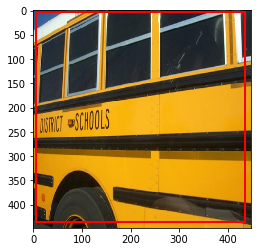

confidence: 0.806119441986084 confidence: 0.80611944 dog: 0.9852325916290283


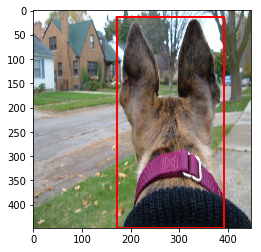

confidence: 0.9788949489593506 confidence: 0.97889495 sheep: 0.9956436157226562
confidence: 0.9782717823982239 confidence: 0.9782718 sheep: 0.999039351940155


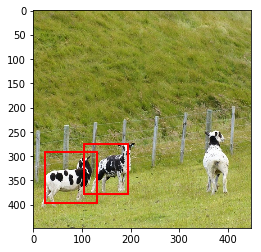

confidence: 0.8853998780250549 confidence: 0.8853999 horse: 0.994355320930481


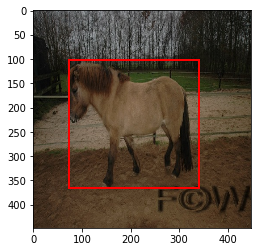

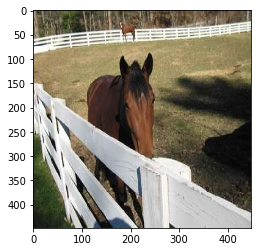

confidence: 0.8752437233924866 confidence: 0.8752437 person: 0.98823082447052


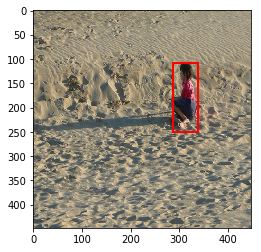

confidence: 0.9890691637992859 confidence: 0.98906916 bottle: 0.9995957016944885
confidence: 0.9628968238830566 confidence: 0.9628968 bottle: 0.9989909529685974
confidence: 0.9168418645858765 confidence: 0.91684186 person: 0.9954791069030762
confidence: 0.8968149423599243 confidence: 0.89681494 chair: 0.9991289973258972
confidence: 0.8826523423194885 confidence: 0.88265234 person: 0.9999047517776489
confidence: 0.8791460990905762 confidence: 0.8791461 bottle: 0.9983736276626587
confidence: 0.7194066643714905 confidence: 0.71940666 person: 0.9687451124191284
confidence: 0.6906750798225403 confidence: 0.6906751 person: 0.9430301785469055
confidence: 0.5792844891548157 confidence: 0.5792845 person: 0.9982160925865173
confidence: 0.5231389999389648 confidence: 0.523139 person: 0.9805933237075806


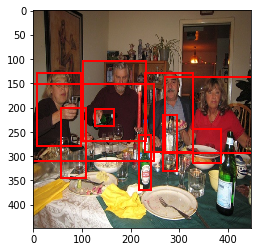

confidence: 0.8838383555412292 confidence: 0.88383836 dog: 0.9978856444358826
confidence: 0.795354425907135 confidence: 0.7953544 dog: 0.9982115030288696


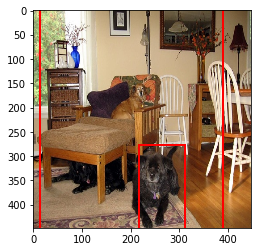

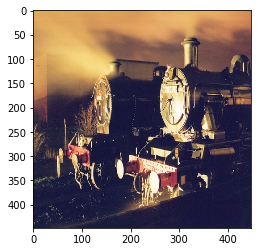

confidence: 0.9997621178627014 confidence: 0.9997621 person: 0.9993244409561157


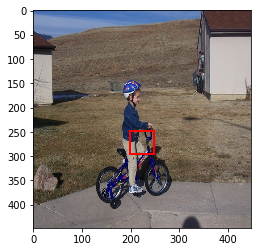

confidence: 0.9504005908966064 confidence: 0.9504006 dog: 0.9969814419746399


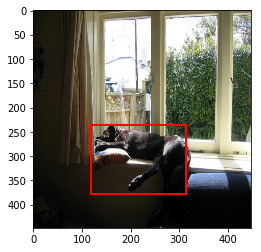

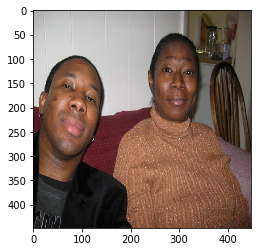

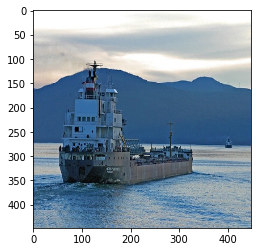

In [10]:
for i in range(X.shape[0]):
    utils.mergeRect(X[i], pred[i], min_c = 0.5, nms_k = 0.5, isTruth = False, tag_num = 1)
    #utils.mergeRect(X[i], y“[i], isTruth = True)